In [328]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import json
from pathlib import Path
import numpy as np
import panel as pn
import hvplot.pandas
import hvplot.dask
from panel.interact import interact
from panel import widgets
import matplotlib.pyplot as plt
import plotly.express as px
from bokeh.models.formatters import DatetimeTickFormatter
%matplotlib inline

In [329]:
pn.extension()

In [330]:
import hvplot.pandas

In [331]:
# Read in data
p_o = Path("../Demographic Information/pasta_orlando.csv")
pasta_orlando_df = pd.read_csv(p_o, parse_dates=True, infer_datetime_format=True, names = ['Orlando Date', 'Orlando Alfredo Pasta', 'Orlando Spaghetti and meatballs'])

p_m = Path("../Demographic Information/pasta_miami.csv")
pasta_miami_df = pd.read_csv(p_m,parse_dates=True,infer_datetime_format=True, names = ['Miami Date', 'Miami Alfredo Pasta', 'Miami Spaghetti and meatballs'])

p_t = Path("../Demographic Information/pasta_tampa.csv")
pasta_tampa_df = pd.read_csv(p_t, parse_dates=True, infer_datetime_format=True, names = ['Tampa Date', 'Tampa Alfredo Pasta', 'Tampa Spaghetti and meatballs'])

pizza_o = Path("../Demographic Information/pizza_orlando.csv")
pizza_orlando_df = pd.read_csv(pizza_o, parse_dates=True, infer_datetime_format=True, names = ['Orlando Date', 'Orlando Pepperoni Pizza', 'Orlando Supreme Pizza'])

pizza_t = Path("../Demographic Information/pizza_tampa.csv")
pizza_miami_df = pd.read_csv(pizza_m, parse_dates=True, infer_datetime_format=True, names = ['Miami Date', 'Miami Pepperoni Pizza', 'Miami Supreme Pizza'])

pizza_m = Path("../Demographic Information/pizza_miami.csv") 
pizza_tampa_df = pd.read_csv(pizza_t, parse_dates=True, infer_datetime_format=True, names = ['Tampa Date', 'Tampa Pepperoni Pizza', 'Tampa Supreme Pizza'])

t_demographic = Path("../Demographic Information/Tampa_Demographic_Characteristics.csv") 
tampa_demo_df = pd.read_csv(t_demographic)

t_socioeconomic = Path("../Demographic Information/Tampa_Socioeconomic_Characteristics.csv")
tampa_socio_df = pd.read_csv(t_socioeconomic)

t_consumer_spending = Path("../Demographic Information/Tampa_Consumer_Spending.csv") 
tampa_consumer_df = pd.read_csv(t_consumer_spending)

m_demographic = Path("../Demographic Information/Miami_Demographic_Characteristics.csv")
miami_demo_df = pd.read_csv(m_demographic)

m_socioeconomic = ("../Demographic Information/Miami_Socioeconomic_Characteristics.csv")
miami_socio_df = pd.read_csv(m_socioeconomic)

m_consumer_spending = ("../Demographic Information/Miami_Consumer_Spending.csv") 
miami_consumer_df = pd.read_csv(m_consumer_spending)

o_demographic = Path("../Demographic Information/Orlando_Demographic_Characteristics.csv")
orlando_demo_df = pd.read_csv(o_demographic)

o_socioeconomic = ("../Demographic Information/Orlando_Socioeconomic_Characteristics.csv")
orlando_socio_df = pd.read_csv(o_socioeconomic)

o_consumer_spending = ("../Demographic Information/Orlando_Consumer_Spending.csv")
orlando_consumer_df = pd.read_csv(o_consumer_spending)

In [332]:
tampa_population = tampa_demo_df.drop(range(1,18))
tampa_population.head()

,Name,Estimate,MOE
0,Total population,387916.0,138.0


In [333]:
tampa_median_income = tampa_socio_df.drop(range(1,25))
tampa_median_income

,Name,Estimate,MOE
0,Median household income,53833.0,980.0


In [334]:
tampa_expenditures = tampa_consumer_df.iloc[[0,1,3,4,12,13,14,15,22]]
tampa_expenditures

,Name,Estimate,MOE
0,Total consumer expenditures per household,77178.58,NaN
1,Consumer expenditures per household on Alcohol...,615.70,NaN
3,Consumer expenditures per household on Beer co...,113.21,NaN
4,Consumer expenditures per household on Wine co...,51.46,NaN
12,Consumer expenditures per household on Dining ...,3815.79,NaN
13,Consumer expenditures per household on Dining ...,382.15,NaN
14,Consumer expenditures per household on Dining ...,1187.69,NaN
15,Consumer expenditures per household on Dining ...,1788.17,NaN
22,Consumer expenditures per household on Food co...,5366.44,NaN


In [335]:
tampa_data = pd.concat([tampa_population, tampa_median_income, tampa_expenditures])
tampa_data.drop(columns=['MOE'])

,Name,Estimate
0,Total population,387916.00
0,Median household income,53833.00
0,Total consumer expenditures per household,77178.58
1,Consumer expenditures per household on Alcohol...,615.70
3,Consumer expenditures per household on Beer co...,113.21
4,Consumer expenditures per household on Wine co...,51.46
12,Consumer expenditures per household on Dining ...,3815.79
13,Consumer expenditures per household on Dining ...,382.15
14,Consumer expenditures per household on Dining ...,1187.69
15,Consumer expenditures per household on Dining ...,1788.17


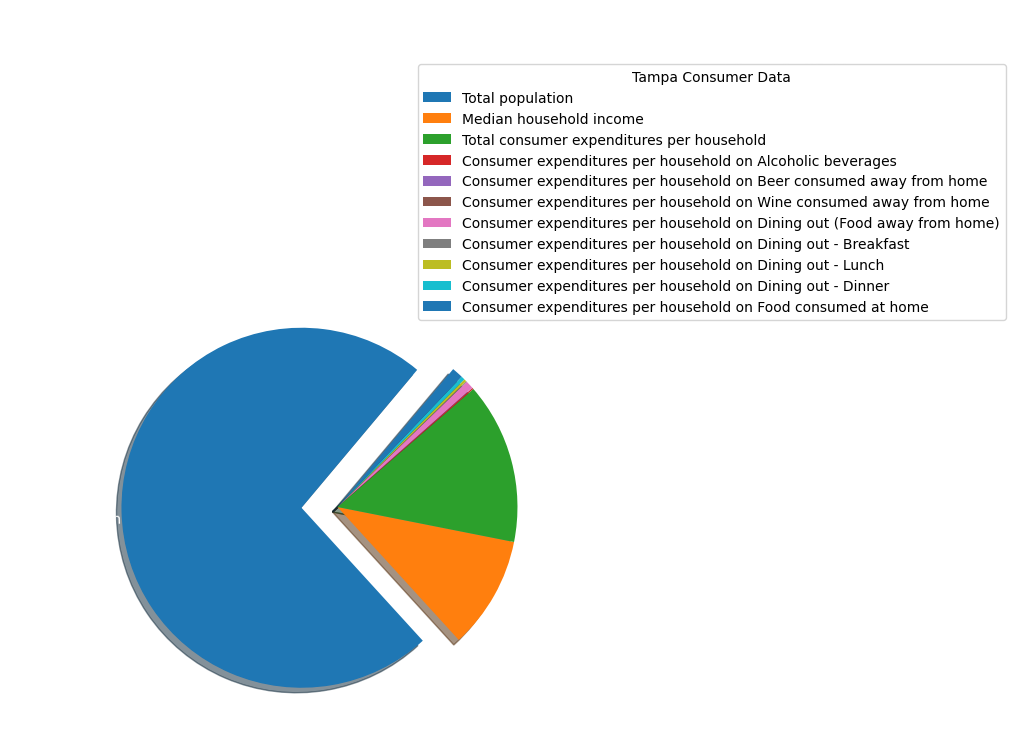

In [336]:
np_arr_ = tampa_data.values
x_ = np_arr_[:,0]
y_= np_arr_[:,1]

fig_tampa = plt.figure(figsize=(8,5), dpi=100)
axes_tampa = fig_tampa.add_axes([0.1,0.1,0.9,0.9])

explode = [0]*11
explode[0]=0.2

wedges, texts= plt.pie(y_, labeldistance=1, explode=explode, labels=x_,shadow=True, startangle=50, textprops=dict(color="w"), rotatelabels=True)

plt.legend(x_, title='Tampa Consumer Data', loc='right', bbox_to_anchor=(1, .7, 1, 1))

tampa_consumer_data = fig_tampa

tampa_consumer_data.savefig('tampa_consumer_data.png')

In [337]:
miami_population = miami_demo_df.drop(range(1,18))
miami_population

,Name,Estimate,MOE
0,Total population,454279.0,101.0


In [338]:
miami_median_income = miami_socio_df.drop(range(1,25))
miami_median_income


,Name,Estimate,MOE
0,Median household income,39049.0,1175.0


In [339]:
miami_expenditures = miami_consumer_df.iloc[[0,1,3,4,12,13,14,15,22]]
miami_expenditures

,Name,Estimate,MOE
0,Total consumer expenditures per household,63595.94,NaN
1,Consumer expenditures per household on Alcohol...,497.58,NaN
3,Consumer expenditures per household on Beer co...,93.08,NaN
4,Consumer expenditures per household on Wine co...,40.26,NaN
12,Consumer expenditures per household on Dining ...,3232.28,NaN
13,Consumer expenditures per household on Dining ...,331.94,NaN
14,Consumer expenditures per household on Dining ...,1017.72,NaN
15,Consumer expenditures per household on Dining ...,1507.89,NaN
22,Consumer expenditures per household on Food co...,4529.00,NaN


In [340]:
miami_data = pd.concat([miami_population, miami_median_income, miami_expenditures])
miami_data.drop(columns=['MOE'],inplace=True)
miami_data.head()

,Name,Estimate
0,Total population,454279.00
0,Median household income,39049.00
0,Total consumer expenditures per household,63595.94
1,Consumer expenditures per household on Alcohol...,497.58
3,Consumer expenditures per household on Beer co...,93.08


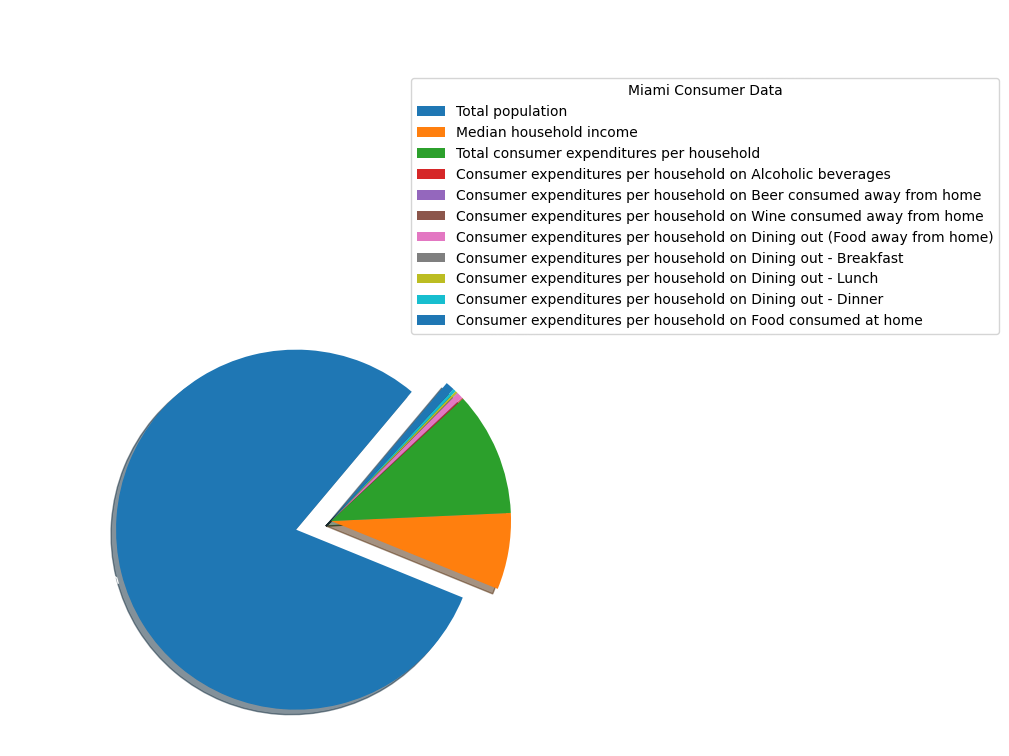

In [341]:
np_arr_1 = miami_data.values
x_1 = np_arr_1[:,0]
y_1 = np_arr_1[:,1]

fig_miami = plt.figure(figsize=(8,5), dpi=100)
axes_miami = fig_miami.add_axes([0.1,0.1,0.9,0.9])

explode = [0]*11
explode[0]=0.2

wedges, texts= plt.pie(y_1, labeldistance=1, explode=explode, labels=x_1,shadow=True, startangle=50, textprops=dict(color="w"), rotatelabels=True)

plt.legend(x_1, title='Miami Consumer Data', loc='right', bbox_to_anchor=(1, .7, 1, 1))

miami_consumer_data = fig_miami

miami_consumer_data.savefig('miami_consumer_data.png')

In [342]:
orlando_population = orlando_demo_df.drop(range(1,18))
orlando_population

,Name,Estimate,MOE
0,Total population,280832.0,201.0


In [343]:
orlando_median_income = orlando_socio_df.drop(range(1,25))
orlando_median_income


,Name,Estimate,MOE
0,Median household income,51757.0,1134.0


In [344]:
orlando_expenditures = orlando_consumer_df.iloc[[0,1,3,4,12,13,14,15,22]]
orlando_expenditures

,Name,Estimate,MOE
0,Total consumer expenditures per household,69288.65,NaN
1,Consumer expenditures per household on Alcohol...,545.95,NaN
3,Consumer expenditures per household on Beer co...,101.35,NaN
4,Consumer expenditures per household on Wine co...,44.73,NaN
12,Consumer expenditures per household on Dining ...,3487.76,NaN
13,Consumer expenditures per household on Dining ...,347.30,NaN
14,Consumer expenditures per household on Dining ...,1097.50,NaN
15,Consumer expenditures per household on Dining ...,1624.60,NaN
22,Consumer expenditures per household on Food co...,4856.48,NaN


In [345]:
orlando_data = pd.concat([orlando_population, orlando_median_income, orlando_expenditures])
orlando_data.drop(columns=['MOE'],inplace=True)
orlando_data

,Name,Estimate
0,Total population,280832.00
0,Median household income,51757.00
0,Total consumer expenditures per household,69288.65
1,Consumer expenditures per household on Alcohol...,545.95
3,Consumer expenditures per household on Beer co...,101.35
4,Consumer expenditures per household on Wine co...,44.73
12,Consumer expenditures per household on Dining ...,3487.76
13,Consumer expenditures per household on Dining ...,347.30
14,Consumer expenditures per household on Dining ...,1097.50
15,Consumer expenditures per household on Dining ...,1624.60


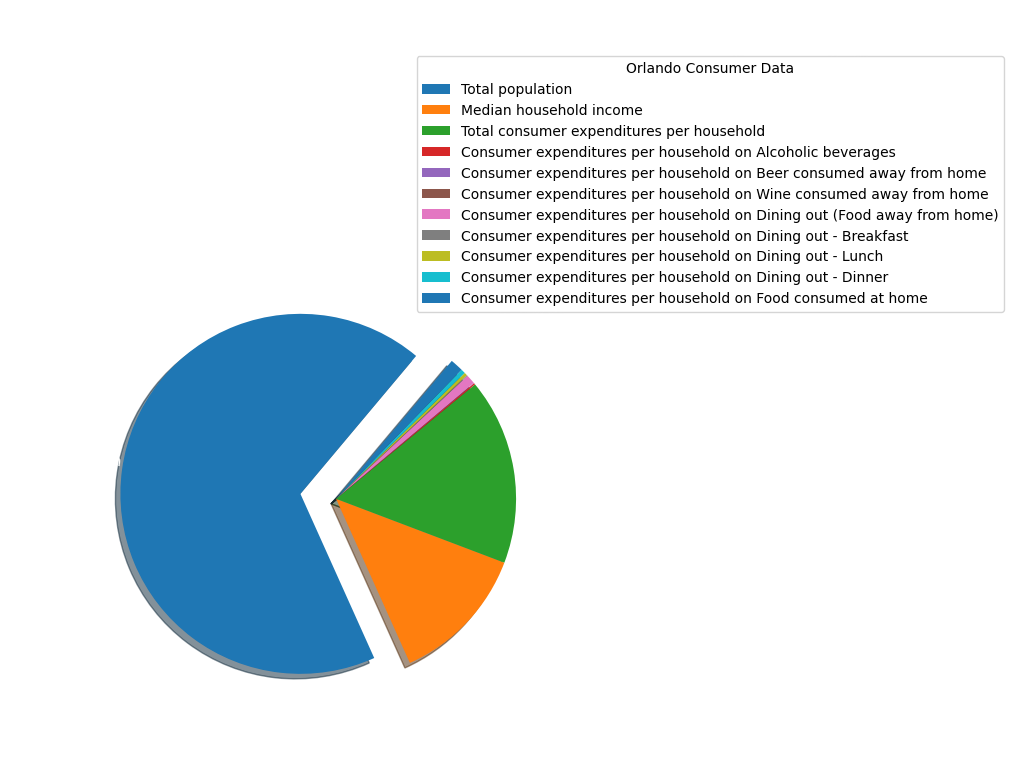

In [346]:
np_arr = orlando_data.values
x_2 = np_arr[:,0]
y_2 = np_arr[:,1]

fig_orlando = plt.figure(figsize=(8,5), dpi=100)
axes_orlando = fig_orlando.add_axes([0.1,0.1,0.9,0.9])

explode = [0]*11
explode[0]=0.2

wedges,texts= plt.pie(y_2, labeldistance=1, explode=explode, labels=x_2,shadow=True, startangle=50, textprops=dict(color="w"), rotatelabels=True)

plt.legend(x_2, title='Orlando Consumer Data', loc='right', bbox_to_anchor=(1, .7, 1, 1))

orlando_consumer_data = fig_orlando

orlando_consumer_data.savefig('Orlando_consumer_data.png')

In [347]:
pasta_orlando_df = pasta_orlando_df.drop(index=0)
pasta_orlando_df = pasta_orlando_df.drop(index=1)
pasta_orlando_df.set_index(pd.to_datetime(pasta_orlando_df['Orlando Date'], infer_datetime_format=True), inplace=True)
pasta_orlando_df.head()


,Orlando Date,Orlando Alfredo Pasta,Orlando Spaghetti and meatballs
Orlando Date,,,
2017-02-05,2017-02-05,18,18
2017-02-12,2017-02-12,18,18
2017-02-19,2017-02-19,0,17
2017-02-26,2017-02-26,51,17
2017-03-05,2017-03-05,0,0


In [348]:
pasta_orlando_df.drop(columns='Orlando Date', inplace=True)
pasta_orlando_df.head()

,Orlando Alfredo Pasta,Orlando Spaghetti and meatballs
Orlando Date,,
2017-02-05,18,18
2017-02-12,18,18
2017-02-19,0,17
2017-02-26,51,17
2017-03-05,0,0


In [349]:
orlando_2017 = pasta_orlando_df['2017-01-01':'2017-12-31']
orlando_2017['Orlando Alfredo Pasta']  = orlando_2017['Orlando Alfredo Pasta'].astype(int)
orlando_2017['Orlando Spaghetti and meatballs']  = orlando_2017['Orlando Spaghetti and meatballs'].astype(int)
orlando_2017.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Orlando Alfredo Pasta,Orlando Spaghetti and meatballs
Orlando Date,,
2017-02-05,18,18
2017-02-12,18,18
2017-02-19,0,17
2017-02-26,51,17
2017-03-05,0,0


In [350]:
orlando_2018 = pasta_orlando_df['2018-01-01':'2018-12-31']
orlando_2018['Orlando Alfredo Pasta']  = orlando_2018['Orlando Alfredo Pasta'].astype(int)
orlando_2018['Orlando Spaghetti and meatballs']  = orlando_2018['Orlando Spaghetti and meatballs'].astype(int)
orlando_2018.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Orlando Alfredo Pasta,Orlando Spaghetti and meatballs
Orlando Date,,
2018-01-07,51,17
2018-01-14,37,0
2018-01-21,0,0
2018-01-28,36,0
2018-02-04,71,0


In [351]:
orlando_2019 = pasta_orlando_df['2019-01-01':'2019-12-31']
orlando_2019['Orlando Alfredo Pasta']  = orlando_2019['Orlando Alfredo Pasta'].astype(int)
orlando_2019['Orlando Spaghetti and meatballs']  = orlando_2019['Orlando Spaghetti and meatballs'].astype(int)
orlando_2019.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Orlando Alfredo Pasta,Orlando Spaghetti and meatballs
Orlando Date,,
2019-01-06,0,0
2019-01-13,50,0
2019-01-20,0,16
2019-01-27,0,0
2019-02-03,0,33


In [352]:
orlando_2020 = pasta_orlando_df['2020-01-01':'2020-12-31']
orlando_2020['Orlando Alfredo Pasta']  = orlando_2020['Orlando Alfredo Pasta'].astype(int)
orlando_2020['Orlando Spaghetti and meatballs']  = orlando_2020['Orlando Spaghetti and meatballs'].astype(int)
orlando_2020.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Orlando Alfredo Pasta,Orlando Spaghetti and meatballs
Orlando Date,,
2020-01-05,0,31
2020-01-12,30,0
2020-01-19,0,0
2020-01-26,46,0
2020-02-02,15,15


In [353]:
orlando_2021 = pasta_orlando_df['2021-01-01':'2021-12-31']
orlando_2021['Orlando Alfredo Pasta']  = orlando_2021['Orlando Alfredo Pasta'].astype(int)
orlando_2021['Orlando Spaghetti and meatballs']  = orlando_2021['Orlando Spaghetti and meatballs'].astype(int)
orlando_2021.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Orlando Alfredo Pasta,Orlando Spaghetti and meatballs
Orlando Date,,
2021-01-03,47,0
2021-01-10,32,48
2021-01-17,32,16
2021-01-24,33,17
2021-01-31,0,0


In [354]:
orlando_2022 = pasta_orlando_df['2022-01-01':'2022-12-31']
orlando_2022['Orlando Alfredo Pasta']  = orlando_2022['Orlando Alfredo Pasta'].astype(int)
orlando_2022['Orlando Spaghetti and meatballs']  = orlando_2022['Orlando Spaghetti and meatballs'].astype(int)
orlando_2022.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Orlando Alfredo Pasta,Orlando Spaghetti and meatballs
Orlando Date,,
2022-01-02,23,0
2022-01-09,11,11
2022-01-16,0,0
2022-01-23,22,11


In [355]:
pasta_miami_df.head()

,Miami Date,Miami Alfredo Pasta,Miami Spaghetti and meatballs
0,Category: All categories,NaN,NaN
1,Week,alfredo pasta: (Miami-Ft. Lauderdale FL),Spaghetti and meatballs: (Miami-Ft. Lauderdale...
2,2017-02-05,15,0
3,2017-02-12,46,0
4,2017-02-19,15,0


In [356]:
pasta_miami_df = pasta_miami_df.drop(index=0)
pasta_miami_df = pasta_miami_df.drop(index=1)
pasta_miami_df.set_index(pd.to_datetime(pasta_miami_df['Miami Date'], infer_datetime_format=True), inplace=True)
pasta_miami_df.head()

,Miami Date,Miami Alfredo Pasta,Miami Spaghetti and meatballs
Miami Date,,,
2017-02-05,2017-02-05,15,0
2017-02-12,2017-02-12,46,0
2017-02-19,2017-02-19,15,0
2017-02-26,2017-02-26,0,0
2017-03-05,2017-03-05,15,0


In [357]:
pasta_miami_df.drop(columns='Miami Date', inplace=True)
pasta_miami_df.head()

,Miami Alfredo Pasta,Miami Spaghetti and meatballs
Miami Date,,
2017-02-05,15,0
2017-02-12,46,0
2017-02-19,15,0
2017-02-26,0,0
2017-03-05,15,0


In [358]:
miami_2017 = pasta_miami_df['2017-01-01':'2017-12-31']
miami_2017['Miami Alfredo Pasta']  = miami_2017['Miami Alfredo Pasta'].astype(int)
miami_2017['Miami Spaghetti and meatballs'] = miami_2017['Miami Spaghetti and meatballs'].astype(int)
miami_2017.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Miami Alfredo Pasta,Miami Spaghetti and meatballs
Miami Date,,
2017-02-05,15,0
2017-02-12,46,0
2017-02-19,15,0
2017-02-26,0,0
2017-03-05,15,0


In [359]:
miami_2018 = pasta_miami_df['2018-01-01':'2018-12-31']
miami_2018['Miami Alfredo Pasta']  = miami_2018['Miami Alfredo Pasta'].astype(int)
miami_2018['Miami Spaghetti and meatballs'] = miami_2018['Miami Spaghetti and meatballs'].astype(int)
miami_2018.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Miami Alfredo Pasta,Miami Spaghetti and meatballs
Miami Date,,
2018-01-07,17,17
2018-01-14,16,32
2018-01-21,0,0
2018-01-28,63,31
2018-02-04,0,0


In [360]:
miami_2019 = pasta_miami_df['2019-01-01':'2019-12-31']
miami_2019['Miami Alfredo Pasta']  = miami_2019['Miami Alfredo Pasta'].astype(int)
miami_2019['Miami Spaghetti and meatballs'] = miami_2019['Miami Spaghetti and meatballs'].astype(int)
miami_2019.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Miami Alfredo Pasta,Miami Spaghetti and meatballs
Miami Date,,
2019-01-06,47,0
2019-01-13,62,0
2019-01-20,0,15
2019-01-27,15,15
2019-02-03,46,0


In [361]:
miami_2020 = pasta_miami_df['2020-01-01':'2020-12-31']
miami_2020['Miami Alfredo Pasta']  = miami_2020['Miami Alfredo Pasta'].astype(int)
miami_2020['Miami Spaghetti and meatballs'] = miami_2020['Miami Spaghetti and meatballs'].astype(int)
miami_2020.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Miami Alfredo Pasta,Miami Spaghetti and meatballs
Miami Date,,
2020-01-05,40,40
2020-01-12,0,0
2020-01-19,13,0
2020-01-26,26,0
2020-02-02,13,13


In [362]:
miami_2021 = pasta_miami_df['2021-01-01':'2021-12-31']
miami_2021['Miami Alfredo Pasta']  = miami_2021['Miami Alfredo Pasta'].astype(int)
miami_2021['Miami Spaghetti and meatballs'] = miami_2021['Miami Spaghetti and meatballs'].astype(int)
miami_2021.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Miami Alfredo Pasta,Miami Spaghetti and meatballs
Miami Date,,
2021-01-03,72,0
2021-01-10,100,14
2021-01-17,29,0
2021-01-24,14,14
2021-01-31,14,14


In [363]:
miami_2022 = pasta_miami_df['2022-01-01':'2022-12-31']
miami_2022['Miami Alfredo Pasta']  = miami_2022['Miami Alfredo Pasta'].astype(int)
miami_2022['Miami Spaghetti and meatballs'] = miami_2022['Miami Spaghetti and meatballs'].astype(int)
miami_2022.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Miami Alfredo Pasta,Miami Spaghetti and meatballs
Miami Date,,
2022-01-02,10,0
2022-01-09,0,0
2022-01-16,10,20
2022-01-23,0,0


In [364]:
pasta_tampa_df

,Tampa Date,Tampa Alfredo Pasta,Tampa Spaghetti and meatballs
0,Category: All categories,NaN,NaN
1,Week,alfredo pasta: (Tampa-St. Petersburg (Sarasota...,Spaghetti and meatballs: (Tampa-St. Petersburg...
2,2017-02-05,0,30
3,2017-02-12,0,0
4,2017-02-19,30,60
...,...,...,...
257,2021-12-26,18,0
258,2022-01-02,18,0
259,2022-01-09,17,17
260,2022-01-16,52,17


In [365]:
pasta_tampa_df = pasta_tampa_df.drop(index=0)
pasta_tampa_df = pasta_tampa_df.drop(index=1)
pasta_tampa_df.set_index(pd.to_datetime(pasta_tampa_df['Tampa Date'], infer_datetime_format=True), inplace=True)
pasta_tampa_df.head()

,Tampa Date,Tampa Alfredo Pasta,Tampa Spaghetti and meatballs
Tampa Date,,,
2017-02-05,2017-02-05,0,30
2017-02-12,2017-02-12,0,0
2017-02-19,2017-02-19,30,60
2017-02-26,2017-02-26,29,0
2017-03-05,2017-03-05,0,29


In [366]:
pasta_tampa_df.drop(columns='Tampa Date', inplace=True)
pasta_tampa_df.head()

,Tampa Alfredo Pasta,Tampa Spaghetti and meatballs
Tampa Date,,
2017-02-05,0,30
2017-02-12,0,0
2017-02-19,30,60
2017-02-26,29,0
2017-03-05,0,29


In [367]:
tampa_2017 = pasta_tampa_df['2017-01-01':'2017-12-31']
tampa_2017['Tampa Alfredo Pasta']  = tampa_2017['Tampa Alfredo Pasta'].astype(int)
tampa_2017['Tampa Spaghetti and meatballs']  = tampa_2017['Tampa Spaghetti and meatballs'].astype(int)
tampa_2017.head()


/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Tampa Alfredo Pasta,Tampa Spaghetti and meatballs
Tampa Date,,
2017-02-05,0,30
2017-02-12,0,0
2017-02-19,30,60
2017-02-26,29,0
2017-03-05,0,29


In [368]:
tampa_2018 = pasta_tampa_df['2018-01-01':'2018-12-31']
tampa_2018['Tampa Alfredo Pasta']  = tampa_2018['Tampa Alfredo Pasta'].astype(int)
tampa_2018['Tampa Spaghetti and meatballs']  = tampa_2018['Tampa Spaghetti and meatballs'].astype(int)
tampa_2018.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Tampa Alfredo Pasta,Tampa Spaghetti and meatballs
Tampa Date,,
2018-01-07,29,29
2018-01-14,30,0
2018-01-21,29,30
2018-01-28,0,0
2018-02-04,0,29


In [369]:
tampa_2019 = pasta_tampa_df['2019-01-01':'2019-12-31']
tampa_2019['Tampa Alfredo Pasta']  = tampa_2019['Tampa Alfredo Pasta'].astype(int)
tampa_2019['Tampa Spaghetti and meatballs']  = tampa_2019['Tampa Spaghetti and meatballs'].astype(int)
tampa_2019.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Tampa Alfredo Pasta,Tampa Spaghetti and meatballs
Tampa Date,,
2019-01-06,30,30
2019-01-13,0,29
2019-01-20,56,0
2019-01-27,0,28
2019-02-03,0,0


In [370]:
tampa_2020 = pasta_tampa_df['2020-01-01':'2020-12-31']
tampa_2020['Tampa Alfredo Pasta']  = tampa_2020['Tampa Alfredo Pasta'].astype(int)
tampa_2020['Tampa Spaghetti and meatballs']  = tampa_2020['Tampa Spaghetti and meatballs'].astype(int)
tampa_2020.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Tampa Alfredo Pasta,Tampa Spaghetti and meatballs
Tampa Date,,
2020-01-05,76,51
2020-01-12,47,0
2020-01-19,0,0
2020-01-26,0,49
2020-02-02,24,0


In [371]:
tampa_2021 = pasta_tampa_df['2021-01-01':'2021-12-31']
tampa_2021['Tampa Alfredo Pasta']  = tampa_2021['Tampa Alfredo Pasta'].astype(int)
tampa_2021['Tampa Spaghetti and meatballs']  = tampa_2021['Tampa Spaghetti and meatballs'].astype(int)
tampa_2021.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Tampa Alfredo Pasta,Tampa Spaghetti and meatballs
Tampa Date,,
2021-01-03,24,0
2021-01-10,47,24
2021-01-17,0,24
2021-01-24,47,24
2021-01-31,24,24


In [372]:
tampa_2022 = pasta_tampa_df['2022-01-01':'2022-12-31']
tampa_2022['Tampa Alfredo Pasta']  = tampa_2022['Tampa Alfredo Pasta'].astype(int)
tampa_2022['Tampa Spaghetti and meatballs']  = tampa_2022['Tampa Spaghetti and meatballs'].astype(int)
tampa_2022.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Tampa Alfredo Pasta,Tampa Spaghetti and meatballs
Tampa Date,,
2022-01-02,18,0
2022-01-09,17,17
2022-01-16,52,17
2022-01-23,52,0


Pizza

In [373]:
pizza_orlando_df.head()

,Orlando Date,Orlando Pepperoni Pizza,Orlando Supreme Pizza
0,Category: All categories,NaN,NaN
1,Week,Pepperoni pizza: (Orlando-Daytona Beach-Melbou...,supreme pizza: (Orlando-Daytona Beach-Melbourn...
2,2017-02-05,22,0
3,2017-02-12,0,0
4,2017-02-19,0,0


In [374]:
pizza_orlando_df = pizza_orlando_df.drop(index=0)
pizza_orlando_df = pizza_orlando_df.drop(index=1)
pizza_orlando_df.set_index(pd.to_datetime(pizza_orlando_df['Orlando Date'], infer_datetime_format=True), inplace=True)
pizza_orlando_df.head()

,Orlando Date,Orlando Pepperoni Pizza,Orlando Supreme Pizza
Orlando Date,,,
2017-02-05,2017-02-05,22,0
2017-02-12,2017-02-12,0,0
2017-02-19,2017-02-19,0,0
2017-02-26,2017-02-26,0,0
2017-03-05,2017-03-05,0,0


In [375]:
pizza_orlando_df.drop(columns='Orlando Date', inplace=True)
pizza_orlando_df.head()

,Orlando Pepperoni Pizza,Orlando Supreme Pizza
Orlando Date,,
2017-02-05,22,0
2017-02-12,0,0
2017-02-19,0,0
2017-02-26,0,0
2017-03-05,0,0


In [376]:
orlando_pizza_2017 = pizza_orlando_df['2017-01-01':'2017-12-31']
orlando_pizza_2017['Orlando Pepperoni Pizza'] = orlando_pizza_2017['Orlando Pepperoni Pizza'].astype(int)
orlando_pizza_2017['Orlando Supreme Pizza'] = orlando_pizza_2017['Orlando Supreme Pizza'].astype(int)
orlando_pizza_2017.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Orlando Pepperoni Pizza,Orlando Supreme Pizza
Orlando Date,,
2017-02-05,22,0
2017-02-12,0,0
2017-02-19,0,0
2017-02-26,0,0
2017-03-05,0,0


In [377]:
orlando_pizza_2018 = pizza_orlando_df['2018-01-01':'2018-12-31']
orlando_pizza_2018['Orlando Pepperoni Pizza'] = orlando_pizza_2018['Orlando Pepperoni Pizza'].astype(int)
orlando_pizza_2018['Orlando Supreme Pizza'] = orlando_pizza_2018['Orlando Supreme Pizza'].astype(int)
orlando_pizza_2018.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Orlando Pepperoni Pizza,Orlando Supreme Pizza
Orlando Date,,
2018-01-07,20,0
2018-01-14,22,0
2018-01-21,22,0
2018-01-28,22,0
2018-02-04,21,0


In [378]:
orlando_pizza_2019 = pizza_orlando_df['2019-01-01':'2019-12-31']
orlando_pizza_2019['Orlando Pepperoni Pizza'] = orlando_pizza_2019['Orlando Pepperoni Pizza'].astype(int)
orlando_pizza_2019['Orlando Supreme Pizza'] = orlando_pizza_2019['Orlando Supreme Pizza'].astype(int)
orlando_pizza_2019.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Orlando Pepperoni Pizza,Orlando Supreme Pizza
Orlando Date,,
2019-01-06,20,0
2019-01-13,20,20
2019-01-20,19,0
2019-01-27,0,20
2019-02-03,0,0


In [379]:
orlando_pizza_2020 = pizza_orlando_df['2020-01-01':'2020-12-31']
orlando_pizza_2020['Orlando Pepperoni Pizza'] = orlando_pizza_2020['Orlando Pepperoni Pizza'].astype(int)
orlando_pizza_2020['Orlando Supreme Pizza'] = orlando_pizza_2020['Orlando Supreme Pizza'].astype(int)
orlando_pizza_2020.head(10)

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Orlando Pepperoni Pizza,Orlando Supreme Pizza
Orlando Date,,
2020-01-05,0,0
2020-01-12,0,0
2020-01-19,19,0
2020-01-26,18,0
2020-02-02,18,0
2020-02-09,0,0
2020-02-16,17,0
2020-02-23,35,17
2020-03-01,35,0


In [380]:
orlando_pizza_2021 = pizza_orlando_df['2021-01-01':'2021-12-31']
orlando_pizza_2021['Orlando Pepperoni Pizza'] = orlando_pizza_2021['Orlando Pepperoni Pizza'].astype(int)
orlando_pizza_2021['Orlando Supreme Pizza'] = orlando_pizza_2021['Orlando Supreme Pizza'].astype(int)
orlando_pizza_2021.head(10)

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Orlando Pepperoni Pizza,Orlando Supreme Pizza
Orlando Date,,
2021-01-03,0,19
2021-01-10,0,0
2021-01-17,19,0
2021-01-24,39,0
2021-01-31,38,0
2021-02-07,19,0
2021-02-14,0,0
2021-02-21,20,0
2021-02-28,40,0


In [381]:
orlando_pizza_2022 = pizza_orlando_df['2022-01-01':'2022-12-31']
orlando_pizza_2022['Orlando Pepperoni Pizza'] = orlando_pizza_2022['Orlando Pepperoni Pizza'].astype(int)
orlando_pizza_2022['Orlando Supreme Pizza'] = orlando_pizza_2022['Orlando Supreme Pizza'].astype(int)
orlando_pizza_2022.head(10)

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Orlando Pepperoni Pizza,Orlando Supreme Pizza
Orlando Date,,
2022-01-02,40,13
2022-01-09,13,0
2022-01-16,0,13
2022-01-23,13,0


In [382]:
pizza_tampa_df

,Tampa Date,Tampa Pepperoni Pizza,Tampa Supreme Pizza
0,Category: All categories,NaN,NaN
1,Week,Pepperoni pizza: (Tampa-St. Petersburg (Saraso...,supreme pizza: (Tampa-St. Petersburg (Sarasota...
2,2017-02-05,33,0
3,2017-02-12,0,0
4,2017-02-19,0,0
...,...,...,...
257,2021-12-26,20,0
258,2022-01-02,0,0
259,2022-01-09,19,19
260,2022-01-16,19,19


In [383]:
pizza_tampa_df = pizza_tampa_df.drop(index=0)
pizza_tampa_df = pizza_tampa_df.drop(index=1)
pizza_tampa_df.set_index(pd.to_datetime(pizza_tampa_df['Tampa Date'], infer_datetime_format=True), inplace=True)
pizza_tampa_df.head()

,Tampa Date,Tampa Pepperoni Pizza,Tampa Supreme Pizza
Tampa Date,,,
2017-02-05,2017-02-05,33,0
2017-02-12,2017-02-12,0,0
2017-02-19,2017-02-19,0,0
2017-02-26,2017-02-26,32,0
2017-03-05,2017-03-05,32,0


In [384]:
pizza_tampa_df.drop(columns='Tampa Date', inplace=True)
pizza_tampa_df.head()

,Tampa Pepperoni Pizza,Tampa Supreme Pizza
Tampa Date,,
2017-02-05,33,0
2017-02-12,0,0
2017-02-19,0,0
2017-02-26,32,0
2017-03-05,32,0


In [385]:
tampa_pizza_2017 = pizza_tampa_df['2017-01-01':'2017-12-31']
tampa_pizza_2017['Tampa Pepperoni Pizza']  = tampa_pizza_2017['Tampa Pepperoni Pizza'].astype(int)
tampa_pizza_2017['Tampa Supreme Pizza']  = tampa_pizza_2017['Tampa Supreme Pizza'].astype(int)
tampa_pizza_2017.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Tampa Pepperoni Pizza,Tampa Supreme Pizza
Tampa Date,,
2017-02-05,33,0
2017-02-12,0,0
2017-02-19,0,0
2017-02-26,32,0
2017-03-05,32,0


In [386]:
tampa_pizza_2018 = pizza_tampa_df['2018-01-01':'2018-12-31']
tampa_pizza_2018['Tampa Pepperoni Pizza']  = tampa_pizza_2018['Tampa Pepperoni Pizza'].astype(int)
tampa_pizza_2018['Tampa Supreme Pizza']  = tampa_pizza_2018['Tampa Supreme Pizza'].astype(int)
tampa_pizza_2018.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Tampa Pepperoni Pizza,Tampa Supreme Pizza
Tampa Date,,
2018-01-07,32,32
2018-01-14,0,0
2018-01-21,32,0
2018-01-28,63,0
2018-02-04,0,0


In [387]:
tampa_pizza_2019 = pizza_tampa_df['2019-01-01':'2019-12-31']
tampa_pizza_2019['Tampa Pepperoni Pizza']  = tampa_pizza_2019['Tampa Pepperoni Pizza'].astype(int)
tampa_pizza_2019['Tampa Supreme Pizza']  = tampa_pizza_2019['Tampa Supreme Pizza'].astype(int)
tampa_pizza_2019.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Tampa Pepperoni Pizza,Tampa Supreme Pizza
Tampa Date,,
2019-01-06,32,0
2019-01-13,0,0
2019-01-20,0,31
2019-01-27,0,31
2019-02-03,31,0


In [388]:
tampa_pizza_2020 = pizza_tampa_df['2020-01-01':'2020-12-31']
tampa_pizza_2020['Tampa Pepperoni Pizza']  = tampa_pizza_2020['Tampa Pepperoni Pizza'].astype(int)
tampa_pizza_2020['Tampa Supreme Pizza']  = tampa_pizza_2020['Tampa Supreme Pizza'].astype(int)
tampa_pizza_2020.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Tampa Pepperoni Pizza,Tampa Supreme Pizza
Tampa Date,,
2020-01-05,28,28
2020-01-12,0,0
2020-01-19,27,27
2020-01-26,0,0
2020-02-02,52,0


In [389]:
tampa_pizza_2021 = pizza_tampa_df['2021-01-01':'2021-12-31']
tampa_pizza_2021['Tampa Pepperoni Pizza']  = tampa_pizza_2021['Tampa Pepperoni Pizza'].astype(int)
tampa_pizza_2021['Tampa Supreme Pizza']  = tampa_pizza_2021['Tampa Supreme Pizza'].astype(int)
tampa_pizza_2021.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Tampa Pepperoni Pizza,Tampa Supreme Pizza
Tampa Date,,
2021-01-03,0,0
2021-01-10,51,26
2021-01-17,26,0
2021-01-24,51,26
2021-01-31,52,0


In [390]:
tampa_pizza_2022 = pizza_tampa_df['2022-01-01':'2022-12-31']
tampa_pizza_2022['Tampa Pepperoni Pizza']  = tampa_pizza_2022['Tampa Pepperoni Pizza'].astype(int)
tampa_pizza_2022['Tampa Supreme Pizza']  = tampa_pizza_2022['Tampa Supreme Pizza'].astype(int)
tampa_pizza_2022.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Tampa Pepperoni Pizza,Tampa Supreme Pizza
Tampa Date,,
2022-01-02,0,0
2022-01-09,19,19
2022-01-16,19,19
2022-01-23,19,0


In [391]:
pizza_miami_df.head()

,Miami Date,Miami Pepperoni Pizza,Miami Supreme Pizza
0,Category: All categories,NaN,NaN
1,Week,Pepperoni pizza: (Miami-Ft. Lauderdale FL),supreme pizza: (Miami-Ft. Lauderdale FL)
2,2017-02-05,20,0
3,2017-02-12,19,0
4,2017-02-19,0,0


In [392]:
pizza_miami_df = pizza_miami_df.drop(index=0)
pizza_miami_df = pizza_miami_df.drop(index=1)
pizza_miami_df.set_index(pd.to_datetime(pizza_miami_df['Miami Date'], infer_datetime_format=True), inplace=True)
pizza_miami_df.head(10)


,Miami Date,Miami Pepperoni Pizza,Miami Supreme Pizza
Miami Date,,,
2017-02-05,2017-02-05,20,0
2017-02-12,2017-02-12,19,0
2017-02-19,2017-02-19,0,0
2017-02-26,2017-02-26,0,0
2017-03-05,2017-03-05,0,0
2017-03-12,2017-03-12,19,0
2017-03-19,2017-03-19,39,0
2017-03-26,2017-03-26,63,0
2017-04-02,2017-04-02,0,0


In [393]:
pizza_miami_df.drop(columns='Miami Date', inplace=True)
pizza_miami_df.head()

,Miami Pepperoni Pizza,Miami Supreme Pizza
Miami Date,,
2017-02-05,20,0
2017-02-12,19,0
2017-02-19,0,0
2017-02-26,0,0
2017-03-05,0,0


In [394]:
miami_pizza_2017 = pizza_miami_df['2017-01-01':'2017-12-31']
miami_pizza_2017['Miami Pepperoni Pizza']  = miami_pizza_2017['Miami Pepperoni Pizza'].astype(int)
miami_pizza_2017['Miami Supreme Pizza']  = miami_pizza_2017['Miami Supreme Pizza'].astype(int)
miami_pizza_2017.head(20)



/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Miami Pepperoni Pizza,Miami Supreme Pizza
Miami Date,,
2017-02-05,20,0
2017-02-12,19,0
2017-02-19,0,0
2017-02-26,0,0
2017-03-05,0,0
2017-03-12,19,0
2017-03-19,39,0
2017-03-26,63,0
2017-04-02,0,0


In [395]:
miami_pizza_2018 = pizza_miami_df['2018-01-01':'2018-12-31']
miami_pizza_2018['Miami Pepperoni Pizza']  = miami_pizza_2018['Miami Pepperoni Pizza'].astype(int)
miami_pizza_2018['Miami Supreme Pizza']  = miami_pizza_2018['Miami Supreme Pizza'].astype(int)
miami_pizza_2018.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Miami Pepperoni Pizza,Miami Supreme Pizza
Miami Date,,
2018-01-07,85,0
2018-01-14,0,0
2018-01-21,0,0
2018-01-28,0,20
2018-02-04,0,0


In [396]:
miami_pizza_2019 = pizza_miami_df['2019-01-01':'2019-12-31']
miami_pizza_2019['Miami Pepperoni Pizza']  = miami_pizza_2019['Miami Pepperoni Pizza'].astype(int)
miami_pizza_2019['Miami Supreme Pizza']  = miami_pizza_2019['Miami Supreme Pizza'].astype(int)
miami_pizza_2019.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Miami Pepperoni Pizza,Miami Supreme Pizza
Miami Date,,
2019-01-06,20,0
2019-01-13,0,0
2019-01-20,76,0
2019-01-27,20,20
2019-02-03,0,39


In [397]:
miami_pizza_2020 = pizza_miami_df['2020-01-01':'2020-12-31']
miami_pizza_2020['Miami Pepperoni Pizza']  = miami_pizza_2020['Miami Pepperoni Pizza'].astype(int)
miami_pizza_2020['Miami Supreme Pizza']  = miami_pizza_2020['Miami Supreme Pizza'].astype(int)
miami_pizza_2020.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Miami Pepperoni Pizza,Miami Supreme Pizza
Miami Date,,
2020-01-05,34,0
2020-01-12,50,17
2020-01-19,0,17
2020-01-26,0,0
2020-02-02,16,0


In [398]:
miami_pizza_2021 = pizza_miami_df['2021-01-01':'2021-12-31']
miami_pizza_2021['Miami Pepperoni Pizza']  = miami_pizza_2021['Miami Pepperoni Pizza'].astype(int)
miami_pizza_2021['Miami Supreme Pizza']  = miami_pizza_2021['Miami Supreme Pizza'].astype(int)
miami_pizza_2021.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Miami Pepperoni Pizza,Miami Supreme Pizza
Miami Date,,
2021-01-03,36,18
2021-01-10,36,0
2021-01-17,55,0
2021-01-24,0,0
2021-01-31,0,0


In [399]:
# Filter data
miami_pizza_2022 = pizza_miami_df['2022-01-01':'2022-12-31']
miami_pizza_2022['Miami Pepperoni Pizza'] = miami_pizza_2022['Miami Pepperoni Pizza'].astype(int)
miami_pizza_2022['Miami Supreme Pizza'] = miami_pizza_2022['Miami Supreme Pizza'].astype(int)
miami_pizza_2022.head()

/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/anthonysegovia/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Miami Pepperoni Pizza,Miami Supreme Pizza
Miami Date,,
2022-01-02,0,0
2022-01-09,26,0
2022-01-16,13,0
2022-01-23,0,12


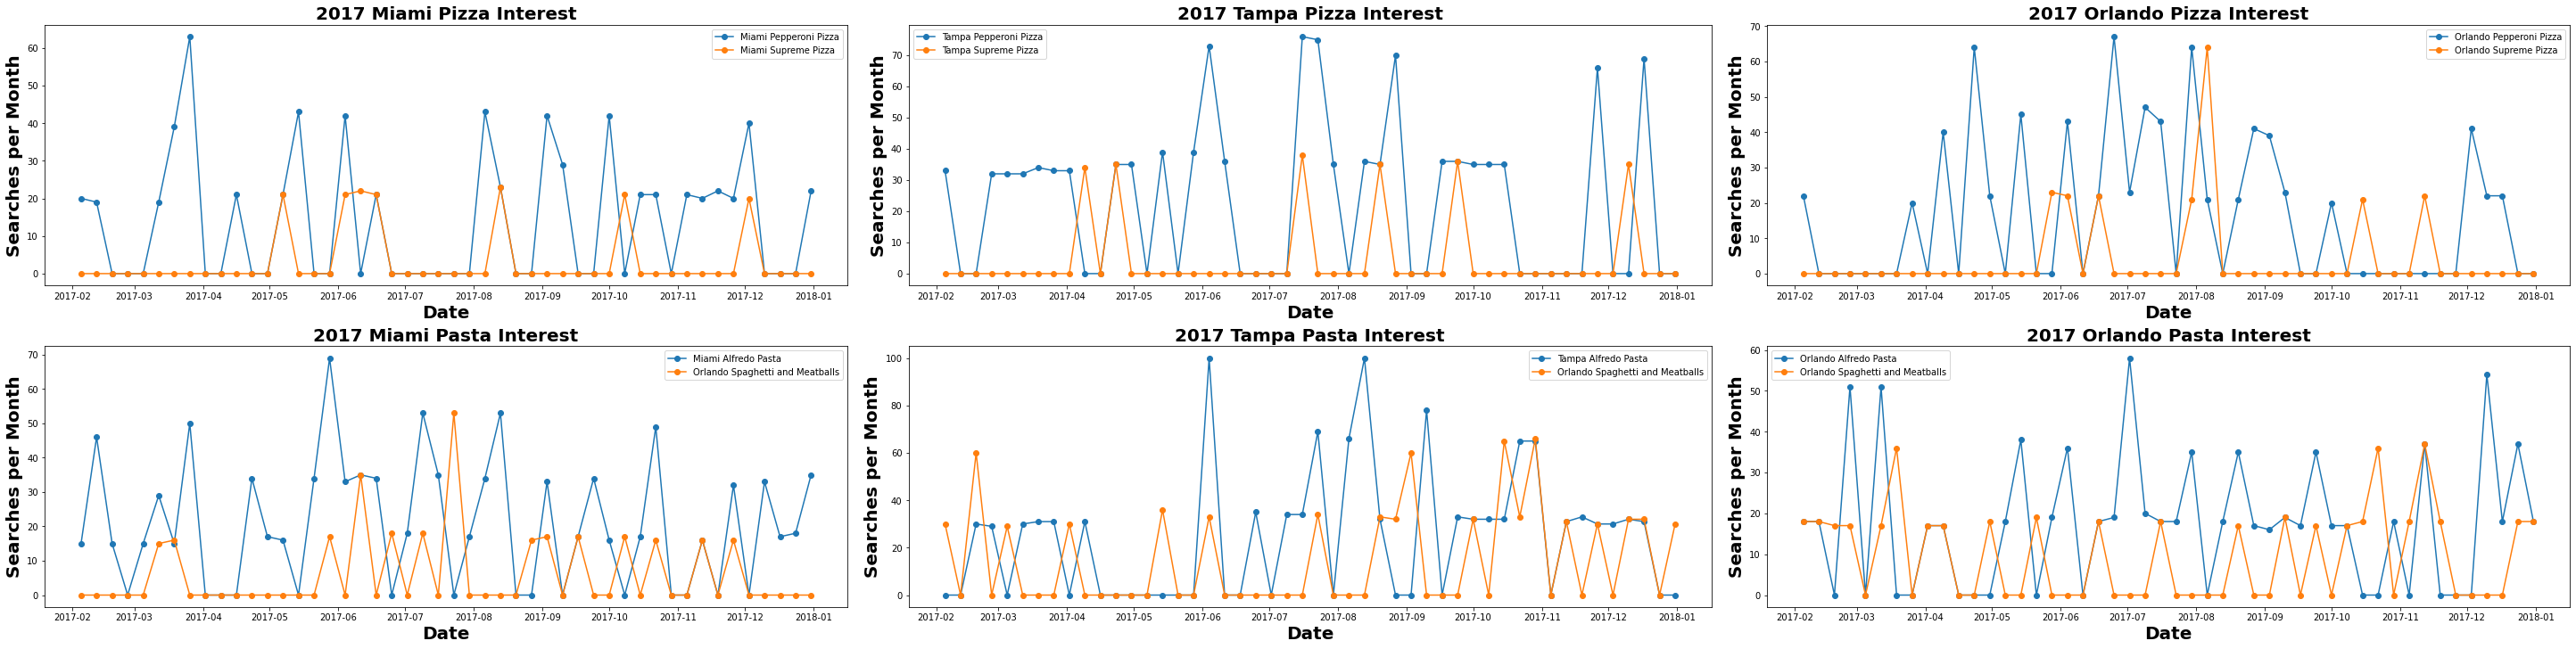

In [444]:
#Plot 2017 
fig = plt.figure(figsize=(40, 10), constrained_layout=True)
spec = fig.add_gridspec(ncols=3, nrows=2)

ax0 = fig.add_subplot(spec[0, 0])
ax0.plot(miami_pizza_2017, marker = 'o', label=(('Miami Pepperoni Pizza'),('Miami Supreme Pizza')))
ax0.set_title('2017 Miami Pizza Interest', fontweight="bold", size=20)
ax0.set_xlabel('Date', fontweight="bold", size=20)  
ax0.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax0.get_legend_handles_labels()
ax0.legend(h, l)

ax1 = fig.add_subplot(spec[0, 1])
ax1.plot(tampa_pizza_2017, marker = 'o', label=(('Tampa Pepperoni Pizza'),('Tampa Supreme Pizza')))
ax1.set_title('2017 Tampa Pizza Interest', fontweight="bold", size=20)
ax1.set_xlabel('Date', fontweight="bold", size=20)  
ax1.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax1.get_legend_handles_labels()
ax1.legend(h, l)

ax2 = fig.add_subplot(spec[0, 2])
ax2.plot(orlando_pizza_2017, marker = 'o', label=(('Orlando Pepperoni Pizza'),('Orlando Supreme Pizza')))
ax2.set_title('2017 Orlando Pizza Interest', fontweight="bold", size=20)
ax2.set_xlabel('Date', fontweight="bold", size=20)  
ax2.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax2.get_legend_handles_labels()
ax2.legend(h, l)

ax3 = fig.add_subplot(spec[1, 0])
ax3.plot(miami_2017, marker = 'o', label=(('Miami Alfredo Pasta'),('Orlando Spaghetti and Meatballs')))
ax3.set_title('2017 Miami Pasta Interest', fontweight="bold", size=20)
ax3.set_xlabel('Date', fontweight="bold", size=20)  
ax3.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax3.get_legend_handles_labels()
ax3.legend(h, l)

ax4 = fig.add_subplot(spec[1, 1])
ax4.plot(tampa_2017, marker = 'o', label=(('Tampa Alfredo Pasta'),('Orlando Spaghetti and Meatballs')))
ax4.set_title('2017 Tampa Pasta Interest', fontweight="bold", size=20)
ax4.set_xlabel('Date', fontweight="bold", size=20)  
ax4.set_ylabel('Searches per Month',fontweight="bold", size=20)

h, l = ax4.get_legend_handles_labels()
ax4.legend(h, l)

ax5 = fig.add_subplot(spec[1, 2])
ax5.plot(orlando_2017, marker = 'o', label=(('Orlando Alfredo Pasta'),('Orlando Spaghetti and Meatballs')))
ax5.set_title('2017 Orlando Pasta Interest', fontweight="bold", size=20)
ax5.set_xlabel('Date', fontweight="bold", size=20)  
ax5.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax5.get_legend_handles_labels()
ax5.legend(h, l)

column_17 = fig

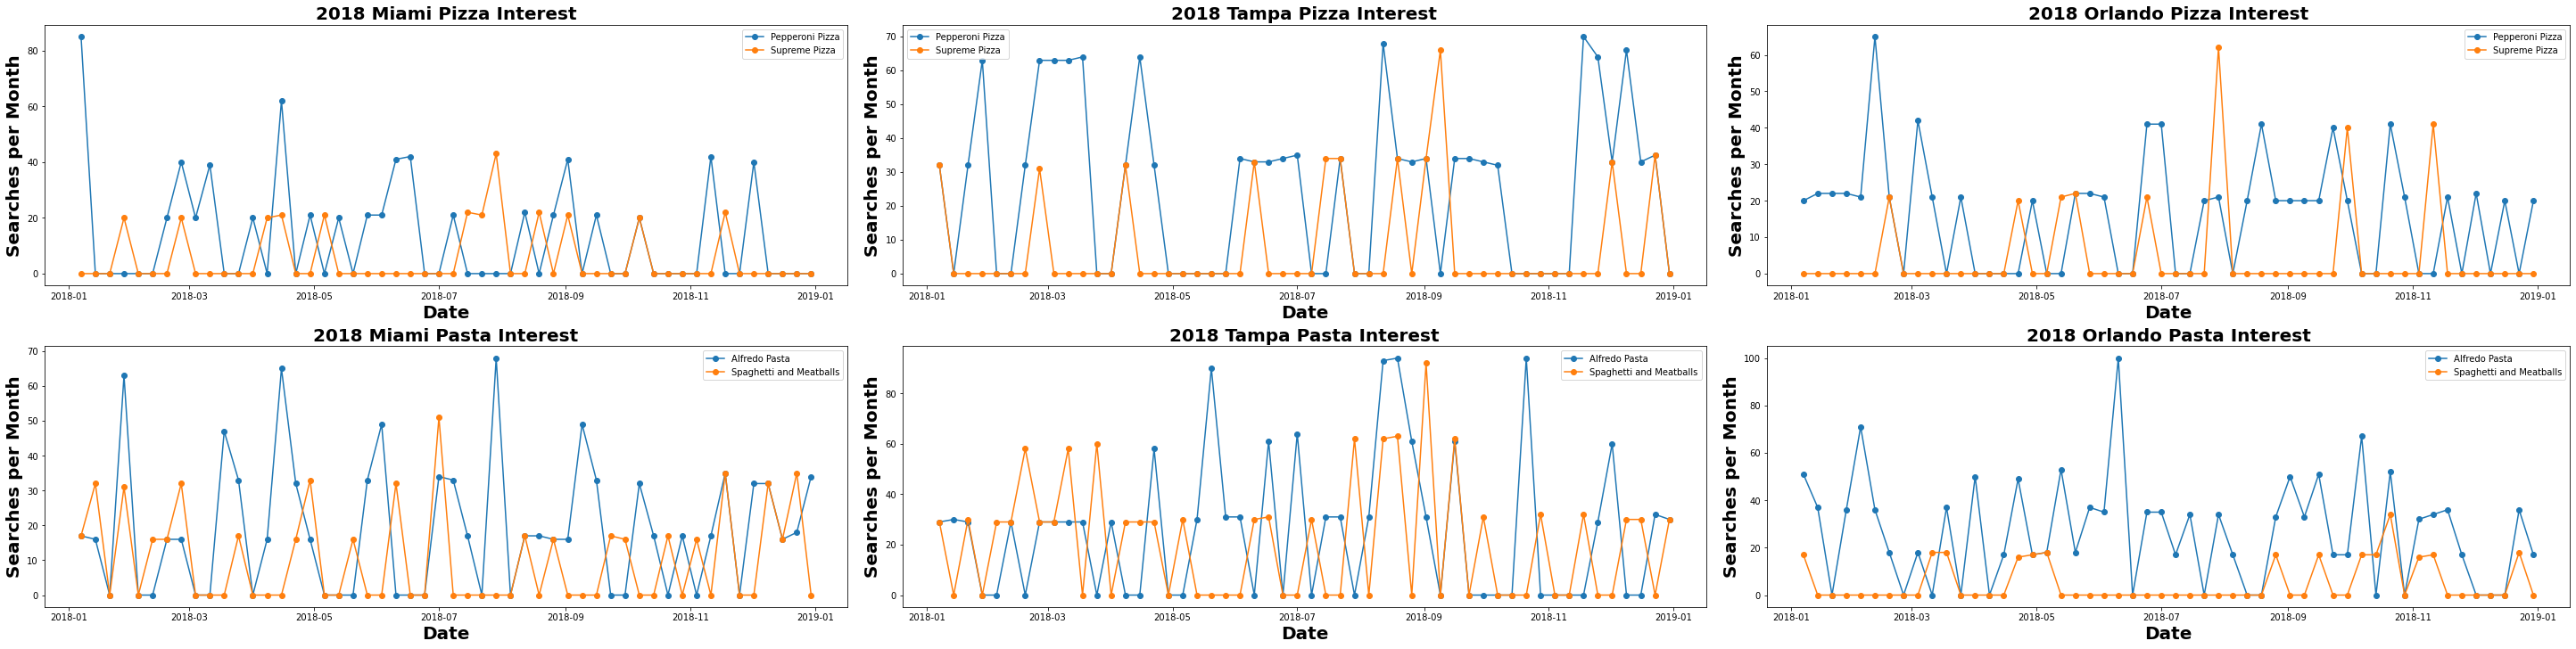

In [447]:
#Plot 2018
fig_1 = plt.figure(figsize=(40, 10), constrained_layout=True)
spec = fig_1.add_gridspec(ncols=3, nrows=2)

ax0 = fig_1.add_subplot(spec[0, 0])
ax0.plot(miami_pizza_2018, marker = 'o', label=(('Pepperoni Pizza'),('Supreme Pizza')))
ax0.set_title('2018 Miami Pizza Interest', fontweight="bold", size=20)
ax0.set_xlabel('Date', fontweight="bold", size=20)  
ax0.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax0.get_legend_handles_labels()
ax0.legend(h, l)

ax1 = fig_1.add_subplot(spec[0, 1])
ax1.plot(tampa_pizza_2018, marker = 'o', label=(('Pepperoni Pizza'),('Supreme Pizza')))
ax1.set_title('2018 Tampa Pizza Interest', fontweight="bold", size=20)
ax1.set_xlabel('Date', fontweight="bold", size=20)  
ax1.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax1.get_legend_handles_labels()
ax1.legend(h, l)

ax2 = fig_1.add_subplot(spec[0, 2])
ax2.plot(orlando_pizza_2018, marker = 'o', label=(('Pepperoni Pizza'),('Supreme Pizza')))
ax2.set_title('2018 Orlando Pizza Interest', fontweight="bold", size=20)
ax2.set_xlabel('Date', fontweight="bold", size=20)  
ax2.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax2.get_legend_handles_labels()
ax2.legend(h, l)

ax3 = fig_1.add_subplot(spec[1, 0])
ax3.plot(miami_2018, marker = 'o', label=(('Alfredo Pasta'),('Spaghetti and Meatballs')))
ax3.set_title('2018 Miami Pasta Interest', fontweight="bold", size=20)
ax3.set_xlabel('Date', fontweight="bold", size=20)  
ax3.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax3.get_legend_handles_labels()
ax3.legend(h, l)

ax4 = fig_1.add_subplot(spec[1, 1])
ax4.plot(tampa_2018, marker = 'o', label=(('Alfredo Pasta'),('Spaghetti and Meatballs')))
ax4.set_title('2018 Tampa Pasta Interest', fontweight="bold", size=20)
ax4.set_xlabel('Date', fontweight="bold", size=20)  
ax4.set_ylabel('Searches per Month',fontweight="bold", size=20)

h, l = ax4.get_legend_handles_labels()
ax4.legend(h, l)

ax5 = fig_1.add_subplot(spec[1, 2])
ax5.plot(orlando_2018, marker = 'o', label=(('Alfredo Pasta'),('Spaghetti and Meatballs')))
ax5.set_title('2018 Orlando Pasta Interest', fontweight="bold", size=20)
ax5.set_xlabel('Date', fontweight="bold", size=20)  
ax5.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax5.get_legend_handles_labels()
ax5.legend(h, l)

column_18 = fig_1

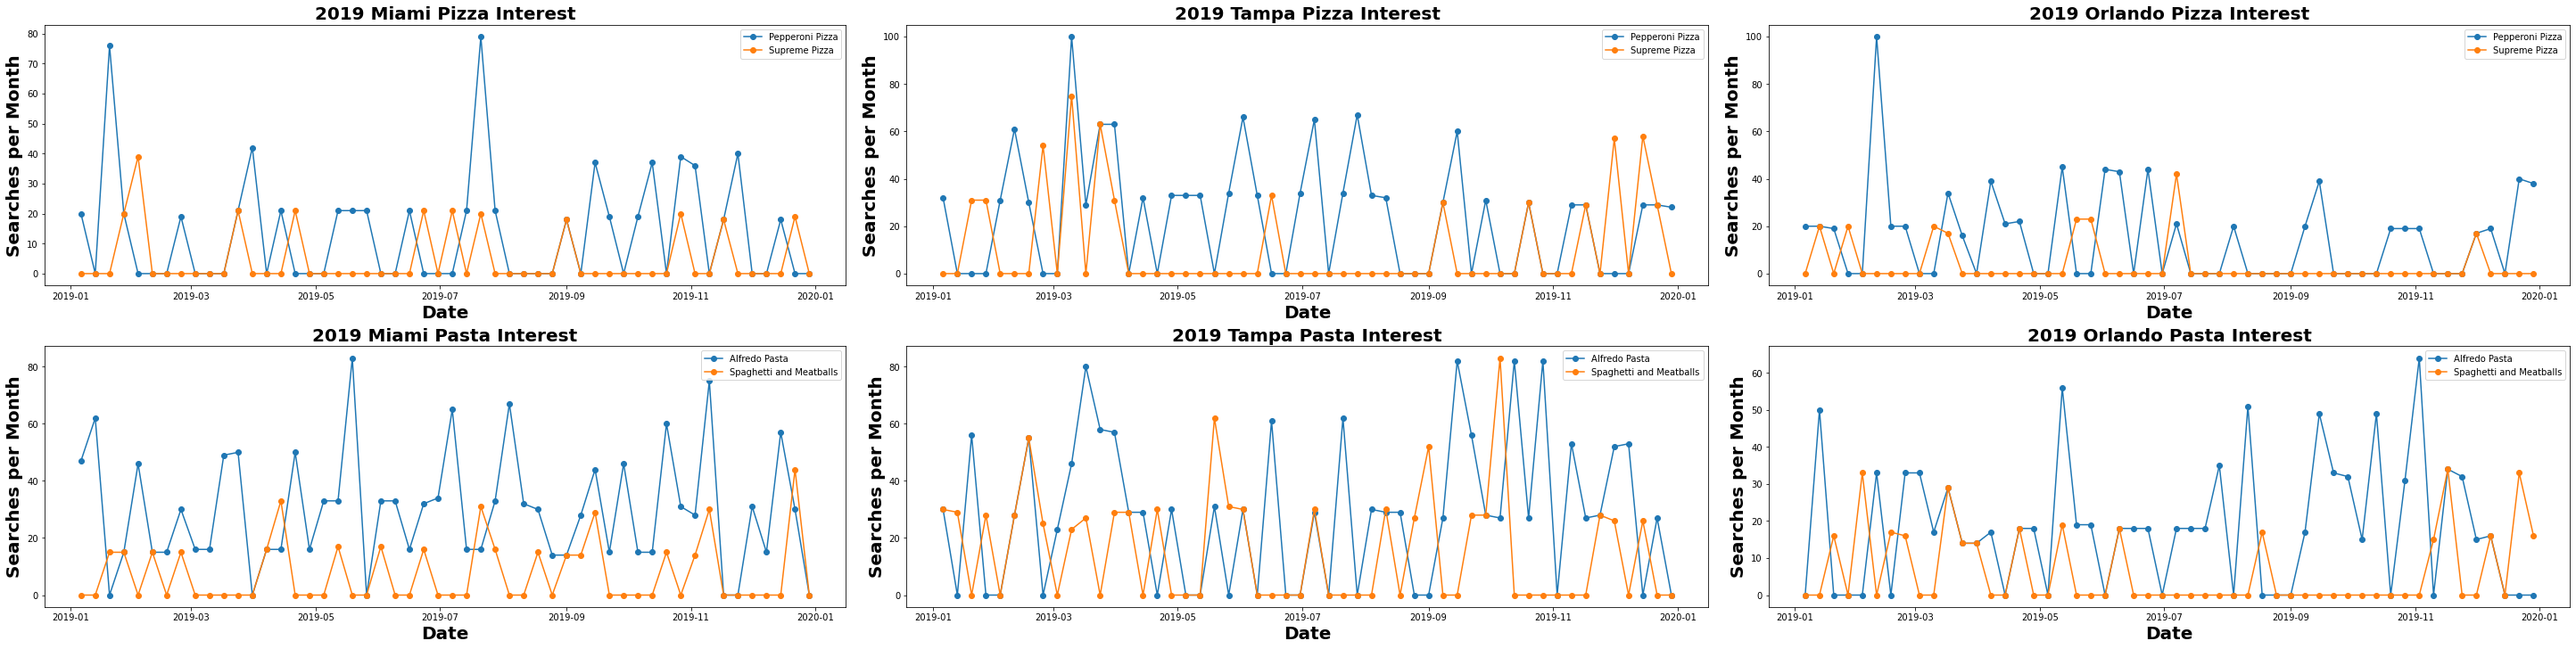

In [448]:
#Plot 2019 
fig_2 = plt.figure(figsize=(40, 10), constrained_layout=True)
spec = fig_2.add_gridspec(ncols=3, nrows=2)

ax0 = fig_2.add_subplot(spec[0, 0])
ax0.plot(miami_pizza_2019, marker = 'o', label=(('Pepperoni Pizza'),('Supreme Pizza')))
ax0.set_title('2019 Miami Pizza Interest', fontweight="bold", size=20)
ax0.set_xlabel('Date', fontweight="bold", size=20)  
ax0.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax0.get_legend_handles_labels()
ax0.legend(h, l)

ax1 = fig_2.add_subplot(spec[0, 1])
ax1.plot(tampa_pizza_2019, marker = 'o', label=(('Pepperoni Pizza'),('Supreme Pizza')))
ax1.set_title('2019 Tampa Pizza Interest', fontweight="bold", size=20)
ax1.set_xlabel('Date', fontweight="bold", size=20)  
ax1.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax1.get_legend_handles_labels()
ax1.legend(h, l)

ax2 = fig_2.add_subplot(spec[0, 2])
ax2.plot(orlando_pizza_2019, marker = 'o', label=(('Pepperoni Pizza'),('Supreme Pizza')))
ax2.set_title('2019 Orlando Pizza Interest', fontweight="bold", size=20)
ax2.set_xlabel('Date', fontweight="bold", size=20)  
ax2.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax2.get_legend_handles_labels()
ax2.legend(h, l)

ax3 = fig_2.add_subplot(spec[1, 0])
ax3.plot(miami_2019, marker = 'o', label=(('Alfredo Pasta'),('Spaghetti and Meatballs')))
ax3.set_title('2019 Miami Pasta Interest', fontweight="bold", size=20)
ax3.set_xlabel('Date', fontweight="bold", size=20)  
ax3.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax3.get_legend_handles_labels()
ax3.legend(h, l)

ax4 = fig_2.add_subplot(spec[1, 1])
ax4.plot(tampa_2019, marker = 'o', label=(('Alfredo Pasta'),('Spaghetti and Meatballs')))
ax4.set_title('2019 Tampa Pasta Interest', fontweight="bold", size=20)
ax4.set_xlabel('Date', fontweight="bold", size=20)  
ax4.set_ylabel('Searches per Month',fontweight="bold", size=20)

h, l = ax4.get_legend_handles_labels()
ax4.legend(h, l)

ax5 = fig_2.add_subplot(spec[1, 2])
ax5.plot(orlando_2019, marker = 'o', label=(('Alfredo Pasta'),('Spaghetti and Meatballs')))
ax5.set_title('2019 Orlando Pasta Interest', fontweight="bold", size=20)
ax5.set_xlabel('Date', fontweight="bold", size=20)  
ax5.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax5.get_legend_handles_labels()
ax5.legend(h, l)

column_19 = fig_2


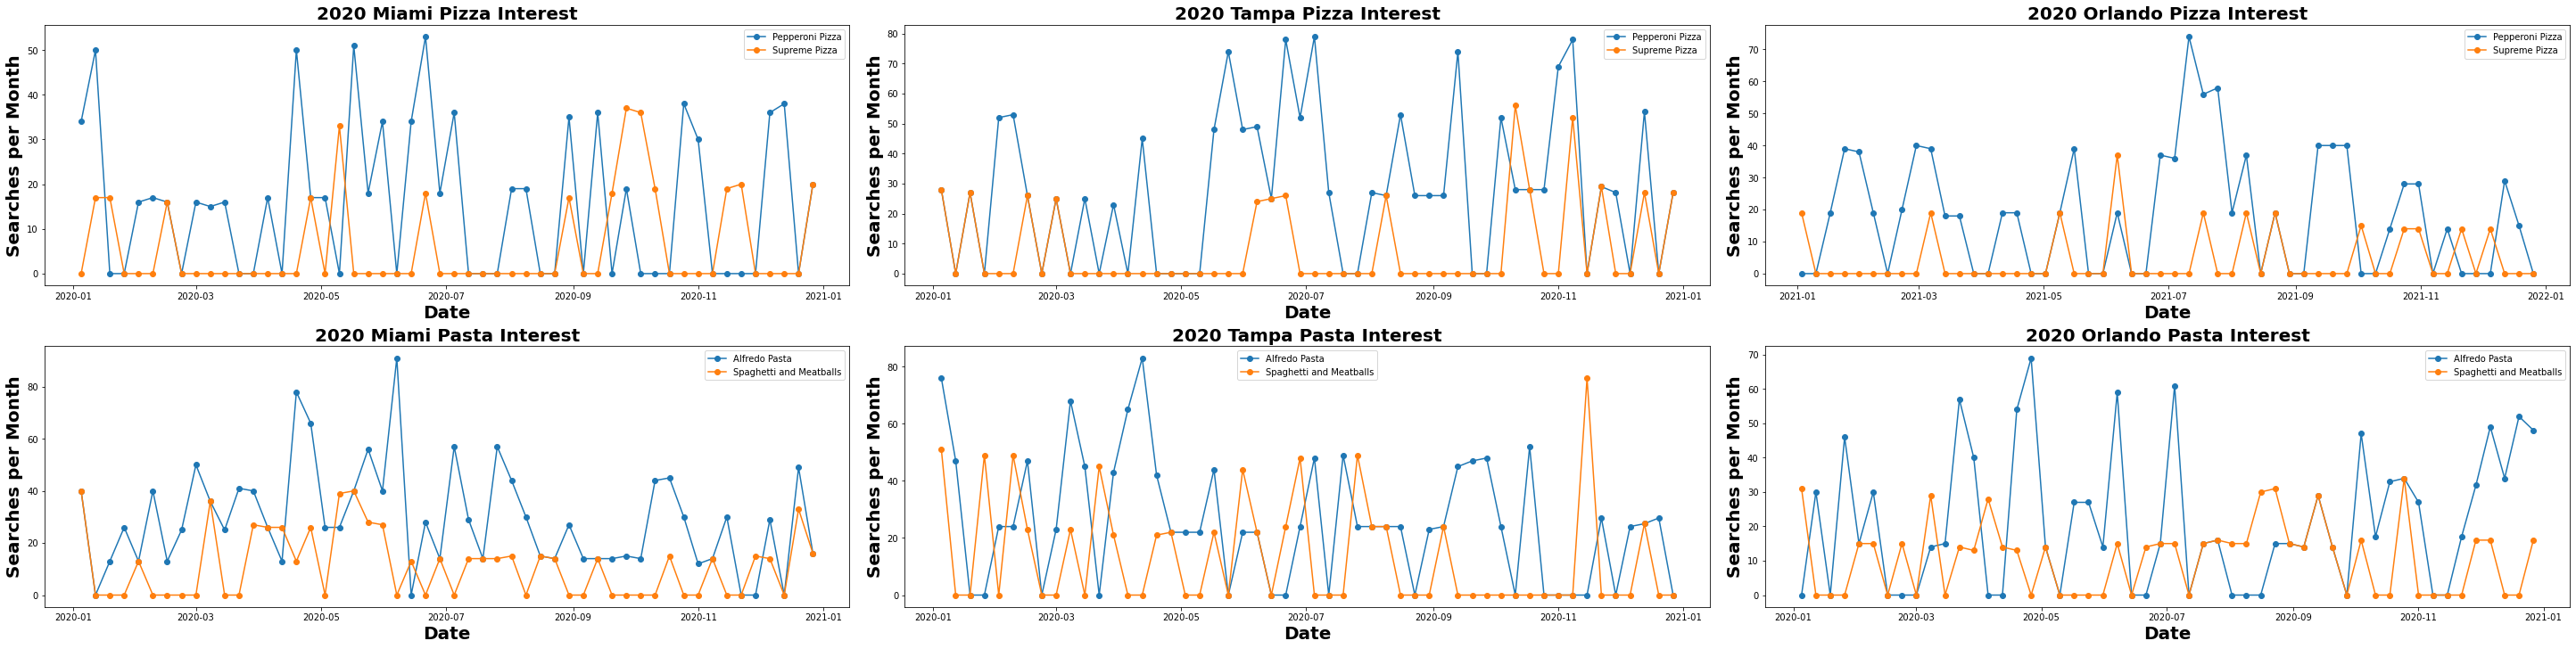

In [449]:
#Plot 2020
fig_3 = plt.figure(figsize=(40, 10), constrained_layout=True)
spec = fig_3.add_gridspec(ncols=3, nrows=2)

ax0 = fig_3.add_subplot(spec[0, 0])
ax0.plot(miami_pizza_2020, marker = 'o', label=(('Pepperoni Pizza'),('Supreme Pizza')))
ax0.set_title('2020 Miami Pizza Interest', fontweight="bold", size=20)
ax0.set_xlabel('Date', fontweight="bold", size=20)  
ax0.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax0.get_legend_handles_labels()
ax0.legend(h, l)

ax1 = fig_3.add_subplot(spec[0, 1])
ax1.plot(tampa_pizza_2020, marker = 'o', label=(('Pepperoni Pizza'),('Supreme Pizza')))
ax1.set_title('2020 Tampa Pizza Interest', fontweight="bold", size=20)
ax1.set_xlabel('Date', fontweight="bold", size=20)  
ax1.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax1.get_legend_handles_labels()
ax1.legend(h, l)

ax2 = fig_3.add_subplot(spec[0, 2])
ax2.plot(orlando_pizza_2021, marker = 'o', label=(('Pepperoni Pizza'),('Supreme Pizza')))
ax2.set_title('2020 Orlando Pizza Interest', fontweight="bold", size=20)
ax2.set_xlabel('Date', fontweight="bold", size=20)  
ax2.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax2.get_legend_handles_labels()
ax2.legend(h, l)

ax3 = fig_3.add_subplot(spec[1, 0])
ax3.plot(miami_2020, marker = 'o', label=(('Alfredo Pasta'),('Spaghetti and Meatballs')))
ax3.set_title('2020 Miami Pasta Interest', fontweight="bold", size=20)
ax3.set_xlabel('Date', fontweight="bold", size=20)  
ax3.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax3.get_legend_handles_labels()
ax3.legend(h, l)

ax4 = fig_3.add_subplot(spec[1, 1])
ax4.plot(tampa_2020, marker = 'o', label=(('Alfredo Pasta'),('Spaghetti and Meatballs')))
ax4.set_title('2020 Tampa Pasta Interest', fontweight="bold", size=20)
ax4.set_xlabel('Date', fontweight="bold", size=20)  
ax4.set_ylabel('Searches per Month',fontweight="bold", size=20)

h, l = ax4.get_legend_handles_labels()
ax4.legend(h, l)

ax5 = fig_3.add_subplot(spec[1, 2])
ax5.plot(orlando_2020, marker = 'o', label=(('Alfredo Pasta'),('Spaghetti and Meatballs')))
ax5.set_title('2020 Orlando Pasta Interest', fontweight="bold", size=20)
ax5.set_xlabel('Date', fontweight="bold", size=20)  
ax5.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax5.get_legend_handles_labels()
ax5.legend(h, l)

column_20 = fig_3

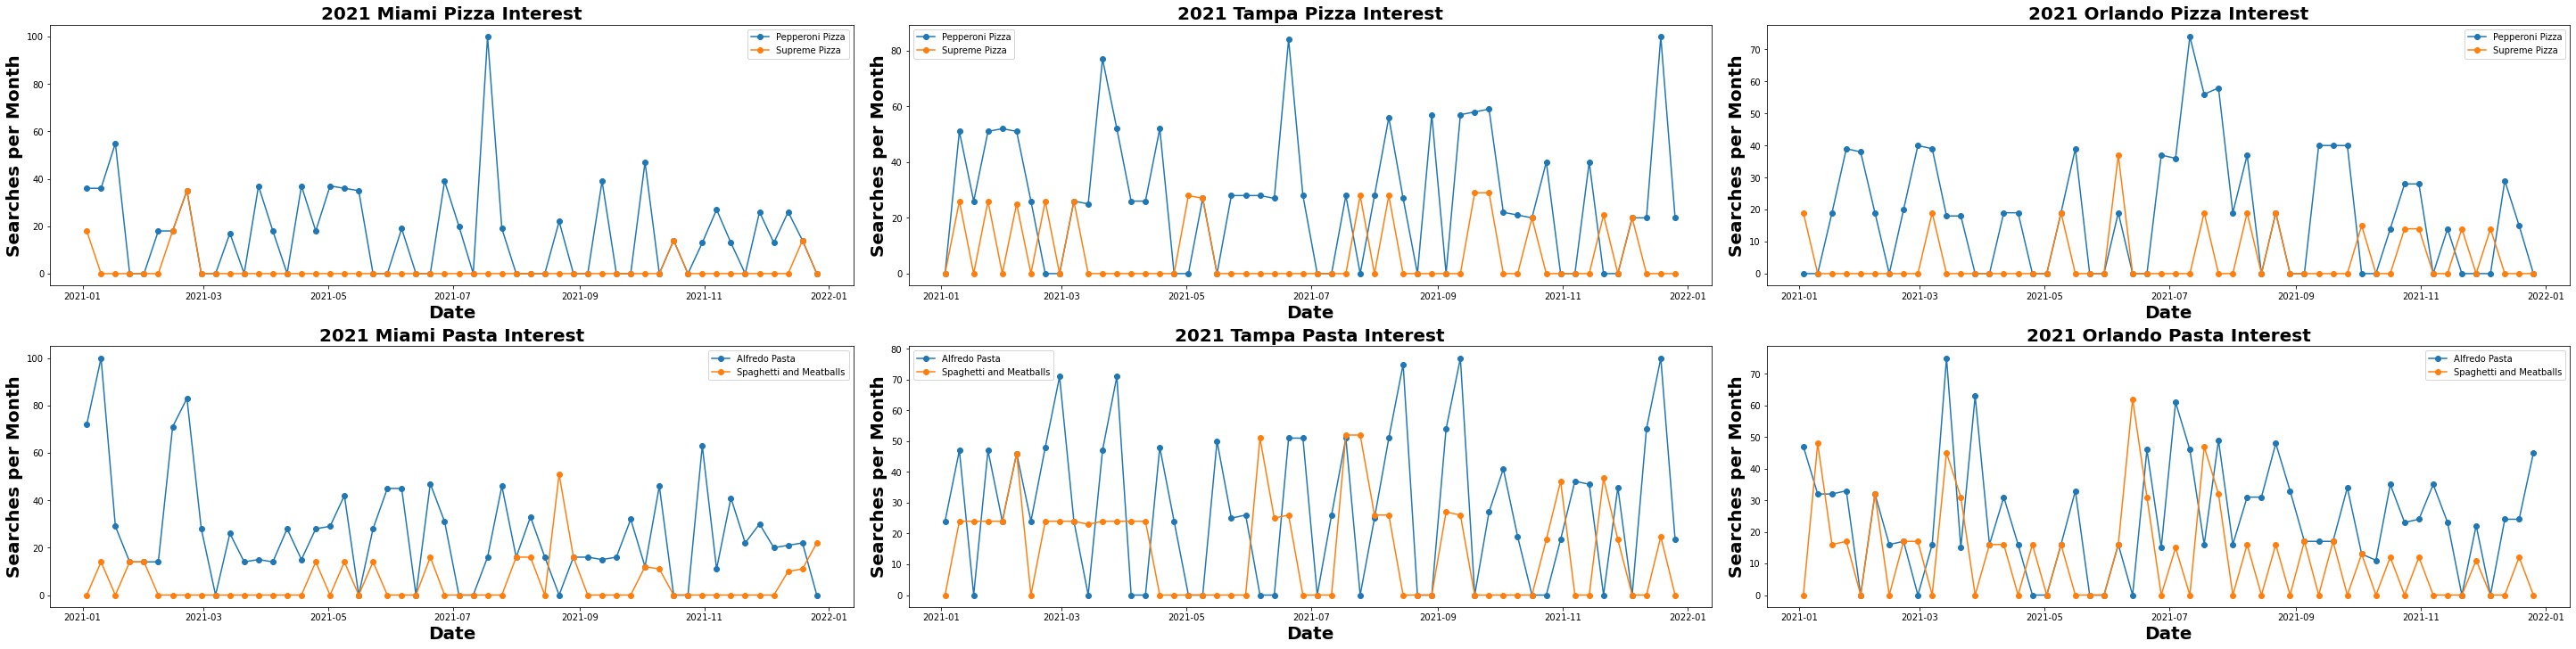

In [450]:
#Plot 2021 
fig_4 = plt.figure(figsize=(40, 10), constrained_layout=True)
spec = fig_4.add_gridspec(ncols=3, nrows=2)

ax0 = fig_4.add_subplot(spec[0, 0])
ax0.plot(miami_pizza_2021, marker = 'o', label=(('Pepperoni Pizza'),('Supreme Pizza')))
ax0.set_title('2021 Miami Pizza Interest', fontweight="bold", size=20)
ax0.set_xlabel('Date', fontweight="bold", size=20)  
ax0.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax0.get_legend_handles_labels()
ax0.legend(h, l)

ax1 = fig_4.add_subplot(spec[0, 1])
ax1.plot(tampa_pizza_2021, marker = 'o', label=(('Pepperoni Pizza'),('Supreme Pizza')))
ax1.set_title('2021 Tampa Pizza Interest', fontweight="bold", size=20)
ax1.set_xlabel('Date', fontweight="bold", size=20)  
ax1.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax1.get_legend_handles_labels()
ax1.legend(h, l)


ax2 = fig_4.add_subplot(spec[0, 2])
ax2.plot(orlando_pizza_2021, marker = 'o', label=(('Pepperoni Pizza'),('Supreme Pizza')))
ax2.set_title('2021 Orlando Pizza Interest', fontweight="bold", size=20)
ax2.set_xlabel('Date', fontweight="bold", size=20)  
ax2.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax2.get_legend_handles_labels()
ax2.legend(h, l)

ax3 = fig_4.add_subplot(spec[1, 0])
ax3.plot(miami_2021, marker = 'o', label=(('Alfredo Pasta'),('Spaghetti and Meatballs')))
ax3.set_title('2021 Miami Pasta Interest', fontweight="bold", size=20)
ax3.set_xlabel('Date', fontweight="bold", size=20)  
ax3.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax3.get_legend_handles_labels()
ax3.legend(h, l)

ax4 = fig_4.add_subplot(spec[1, 1])
ax4.plot(tampa_2021, marker = 'o', label=(('Alfredo Pasta'),('Spaghetti and Meatballs')))
ax4.set_title('2021 Tampa Pasta Interest', fontweight="bold", size=20)
ax4.set_xlabel('Date', fontweight="bold", size=20)  
ax4.set_ylabel('Searches per Month',fontweight="bold", size=20)

h, l = ax4.get_legend_handles_labels()
ax4.legend(h, l)

ax5 = fig_4.add_subplot(spec[1, 2])
ax5.plot(orlando_2021, marker = 'o', label=(('Alfredo Pasta'),('Spaghetti and Meatballs')))
ax5.set_title('2021 Orlando Pasta Interest', fontweight="bold", size=20)
ax5.set_xlabel('Date', fontweight="bold", size=20)  
ax5.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax5.get_legend_handles_labels()
ax5.legend(h, l)

column_21 = fig_4


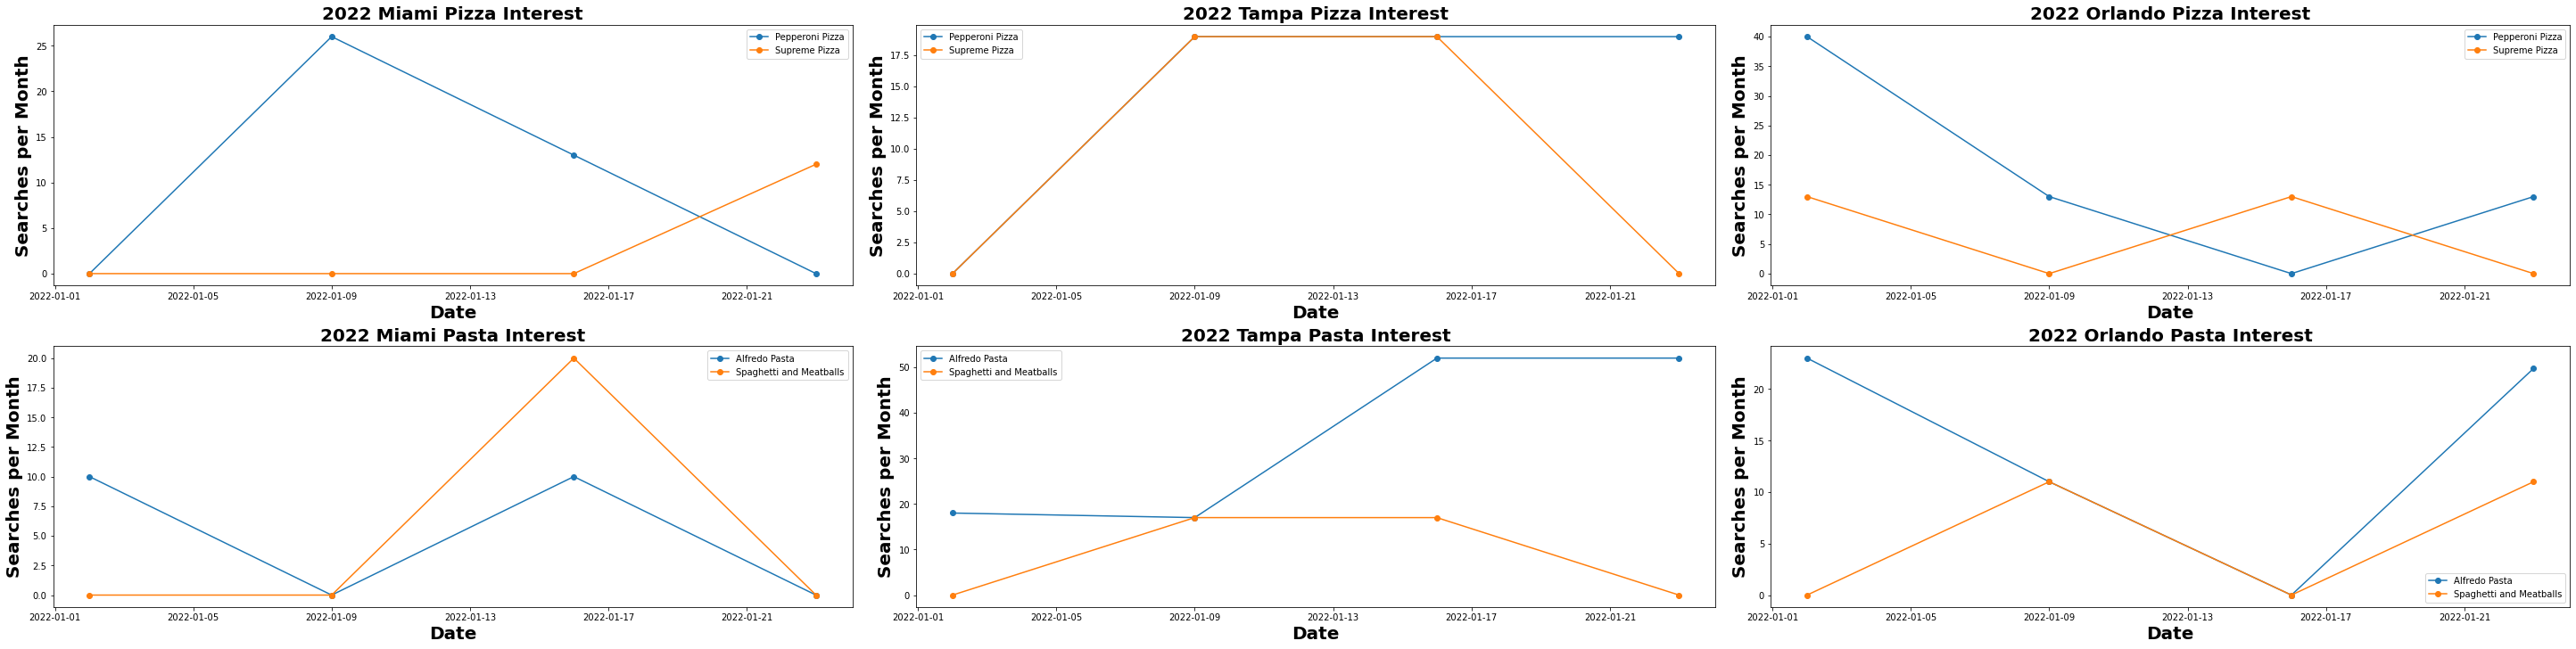

In [451]:
#plot 22
fig_5 = plt.figure(figsize=(40, 10), constrained_layout=True)
spec = fig_5.add_gridspec(ncols=3, nrows=2)

ax0 = fig_5.add_subplot(spec[0, 0])
ax0.plot(miami_pizza_2022, marker = 'o', label=(('Pepperoni Pizza'),('Supreme Pizza')))
ax0.set_title('2022 Miami Pizza Interest', fontweight="bold", size=20)
ax0.set_xlabel('Date', fontweight="bold", size=20)  
ax0.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax0.get_legend_handles_labels()
ax0.legend(h, l)

ax1 = fig_5.add_subplot(spec[0, 1])
ax1.plot(tampa_pizza_2022, marker = 'o', label=(('Pepperoni Pizza'),('Supreme Pizza')))
ax1.set_title('2022 Tampa Pizza Interest', fontweight="bold", size=20)
ax1.set_xlabel('Date', fontweight="bold", size=20)  
ax1.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax1.get_legend_handles_labels()
ax1.legend(h, l)

ax2 = fig_5.add_subplot(spec[0, 2])
ax2.plot(orlando_pizza_2022, marker = 'o', label=(('Pepperoni Pizza'),('Supreme Pizza')))
ax2.set_title('2022 Orlando Pizza Interest', fontweight="bold", size=20)
ax2.set_xlabel('Date', fontweight="bold", size=20)  
ax2.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax2.get_legend_handles_labels()
ax2.legend(h, l)

ax3 = fig_5.add_subplot(spec[1, 0])
ax3.plot(miami_2022, marker = 'o', label=(('Alfredo Pasta'),('Spaghetti and Meatballs')))
ax3.set_title('2022 Miami Pasta Interest', fontweight="bold", size=20)
ax3.set_xlabel('Date', fontweight="bold", size=20)  
ax3.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax3.get_legend_handles_labels()
ax3.legend(h, l)

ax4 = fig_5.add_subplot(spec[1, 1])
ax4.plot(tampa_2022, marker = 'o', label=(('Alfredo Pasta'),('Spaghetti and Meatballs')))
ax4.set_title('2022 Tampa Pasta Interest', fontweight="bold", size=20)
ax4.set_xlabel('Date', fontweight="bold", size=20)  
ax4.set_ylabel('Searches per Month',fontweight="bold", size=20)

h, l = ax4.get_legend_handles_labels()
ax4.legend(h, l)


ax5 = fig_5.add_subplot(spec[1, 2])
ax5.plot(orlando_2022, marker = 'o', label=(('Alfredo Pasta'),('Spaghetti and Meatballs')))
ax5.set_title('2022 Orlando Pasta Interest', fontweight="bold", size=20)
ax5.set_xlabel('Date', fontweight="bold", size=20)  
ax5.set_ylabel('Searches per Month', fontweight="bold", size=20)

h, l = ax5.get_legend_handles_labels()
ax5.legend(h, l)

column_22 =  fig_5
